To test the smoothed finite difference scheme in pysindy
https://github.com/dynamicslab/pysindy

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from pysindy.differentiation import SmoothedFiniteDifference

In [139]:
x = np.linspace(0, 6*np.pi,10000)
y = np.sin(x)
mean_absolute_v = np.mean(np.abs(y))
y_noisy = y + np.random.normal(loc=0.0, scale=0.1*mean_absolute_v,size=len(x))

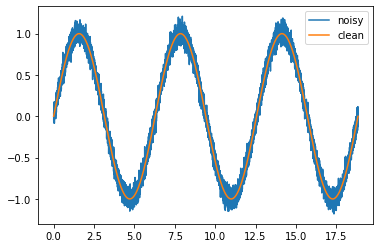

In [140]:
plt.plot(x,y_noisy, label='noisy')
plt.plot(x,y, label='clean')
plt.legend()

In [141]:
firstD_clean = np.gradient(y,x)
firstD_noisy = np.gradient(y_noisy, x)
secondD_clean = np.gradient(firstD_clean, x)
secondD_noisy = np.gradient(firstD_noisy, x)

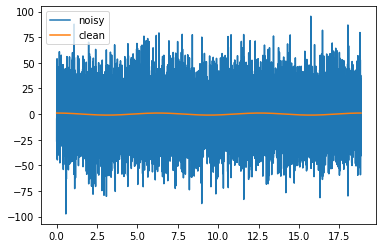

In [142]:
plt.plot(x, firstD_noisy,label='noisy')
plt.plot(x, firstD_clean,label='clean')
plt.legend()

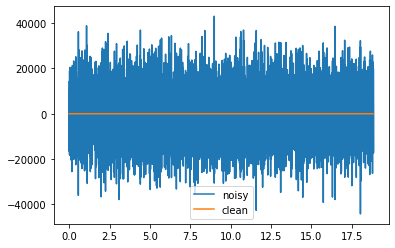

In [143]:
plt.plot(x, secondD_noisy,label='noisy')
plt.plot(x, secondD_clean,label='clean')
plt.legend()

In [153]:
sfd = SmoothedFiniteDifference(smoother_kws={'window_length': 1501})
firstD_smoothed = sfd._differentiate(np.expand_dims(y_noisy,axis=1), x)
secondD_smoothed = sfd._differentiate(firstD_smoothed, x)

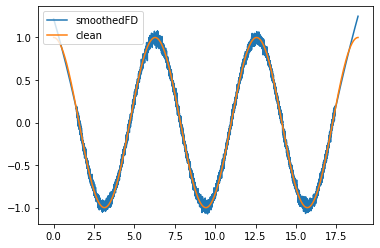

In [154]:
plt.plot(x,firstD_smoothed,label='smoothedFD')
plt.plot(x,firstD_clean,label='clean')
plt.legend()

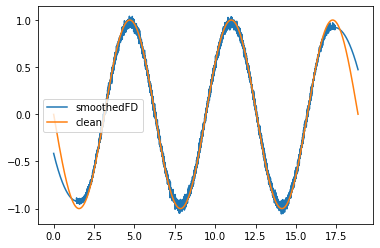

In [155]:
plt.plot(x,secondD_smoothed,label='smoothedFD')
plt.plot(x,secondD_clean, label='clean')
plt.legend()